In [1]:
from pathlib import Path

base_dir = Path.joinpath(Path.cwd(), "ATBI_02_Suppl")
data_dir = Path.joinpath(base_dir, "data/")
images_dir = Path.joinpath(base_dir, "images/")

### 1. "Real-Life" Example: PLAT and *Alu* sequence


In [2]:
### Raw Data ###
primer1 = "GTGAAAAGCAAGGTCTACCAG"
primer2 = "GTCAAGATGAACTCGGTGTC"

In [3]:
### Get raw sequences ###

# 1. go to: https://www.omim.org/ and search for PLAT
# 2. click on "DNA" and navigate to "Ensembl"
# 3. click on "Download sequence" > "Preview" > search for "Intron 8" > copy sequence
# 4. click on "Show transcript table" > click on "NM_000930.5"
# 5. search for "PLAT Alu sequence" in NCBI Nucleotides > select first entry (GenBank: K03021.1)
# 6. download FASTA sequence > save as "PLATwithALUsequence.fasta"
# 7. process raw sequences and extract sequence between primers

In [4]:
### Get raw sequences ###
raw_withoutAlu = "TBD"

from Bio import SeqIO, Seq

fasta = "PLATwithALUsequence.fasta"

# read FASTA file
fa_handle = SeqIO.parse(data_dir / fasta, "fasta")

rec = next(fa_handle)
raw_withAlu = rec.seq
print(raw_withAlu[:20])


TTCACACAACTGGTGCTGTT


In [5]:
### Extract sequence between primers ###
withoutAlu = raw_withoutAlu[raw_withoutAlu.find(primer1) + len(primer1):raw_withoutAlu.find(primer2)]
withAlu = raw_withAlu[raw_withAlu.find(primer1) + len(primer1):raw_withAlu.find(primer2)]

print("Without Alu:", withoutAlu)
print("With Alu:", withAlu)

Without Alu: 
With Alu: TTTTCCAACCTAAATCCCAAGTTAAGGGTCCTGGCCTGTAACCATTTAGTCCTCAGCTGTTCTCCTGACATCTTTATTGCAATGATTTGTAAGAGTTCCGTAACAGGACAGCTCACAGTTCTGTCTGACAACCCTATGAGATTAGAACACTACGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCGGGCGGATCACGAGGTCAGGAGATCGAGACCATCCCGGCTAAAACGGTGAAACCCCGTCTCTACTAAAACTACAAAAAATAGCCGGGCGTAGTGGCGGGCGCCTGTAGTCCTGGCTACTTGGGAGGCTGAGGCAGGAGAATGGCATGAACCCGGGAGGCGGAGCTTGCAGTGAGCCGAGATCCCGCCACTGCACTCCAGCCTGGGCAACAGAGCGAGACTCCGTCTCAAAAAAAAAAAAAAAAAAAAAAGAACACTACATTACTGACTGGGTAACAAAGTTAAAGAGAAGTTCTCCTAGGGTGGGGGTGTGCTGCAAG


In [6]:
### Compare Sequences ###
# 8. go to https://dotlet.vital-it.ch/
# 9. search for ORFs (using ORFfinder: https://www.ncbi.nlm.nih.gov/orffinder/) > insert sequence with Alu > calculate Start of Alu sequence

alu_sequence = "TBD"
start_pos_alu = withAlu.find(alu_sequence)
end_pos_alu = start_pos_alu + len(alu_sequence)
print("Start: ", start_pos_alu)
print("End:   ", end_pos_alu)

# 10. find ORFs (ORF169)
# 11. (optional) go to https://alfred.med.yale.edu/ and enter PLAT > choose "Plasminogen activator, tissue" > select "TPA25 Alu insertion" > click on "Frequency Display Formats: Graph" > learn something about human migration ;)

Start:  -1
End:    2


### 2. "Real-Life" Example: Point mutation in chronic myeloid leukemia (CML) NGS data


In [7]:
### Raw Data ###
primer1 = "TACGACAAGTGGGAGATGGAACG"
primer2 = "TGTTGTAGGCCAGGCTCTCG"

R1 = "E255K_R1.fastq"
R2 = "E255K_R2.fastq"

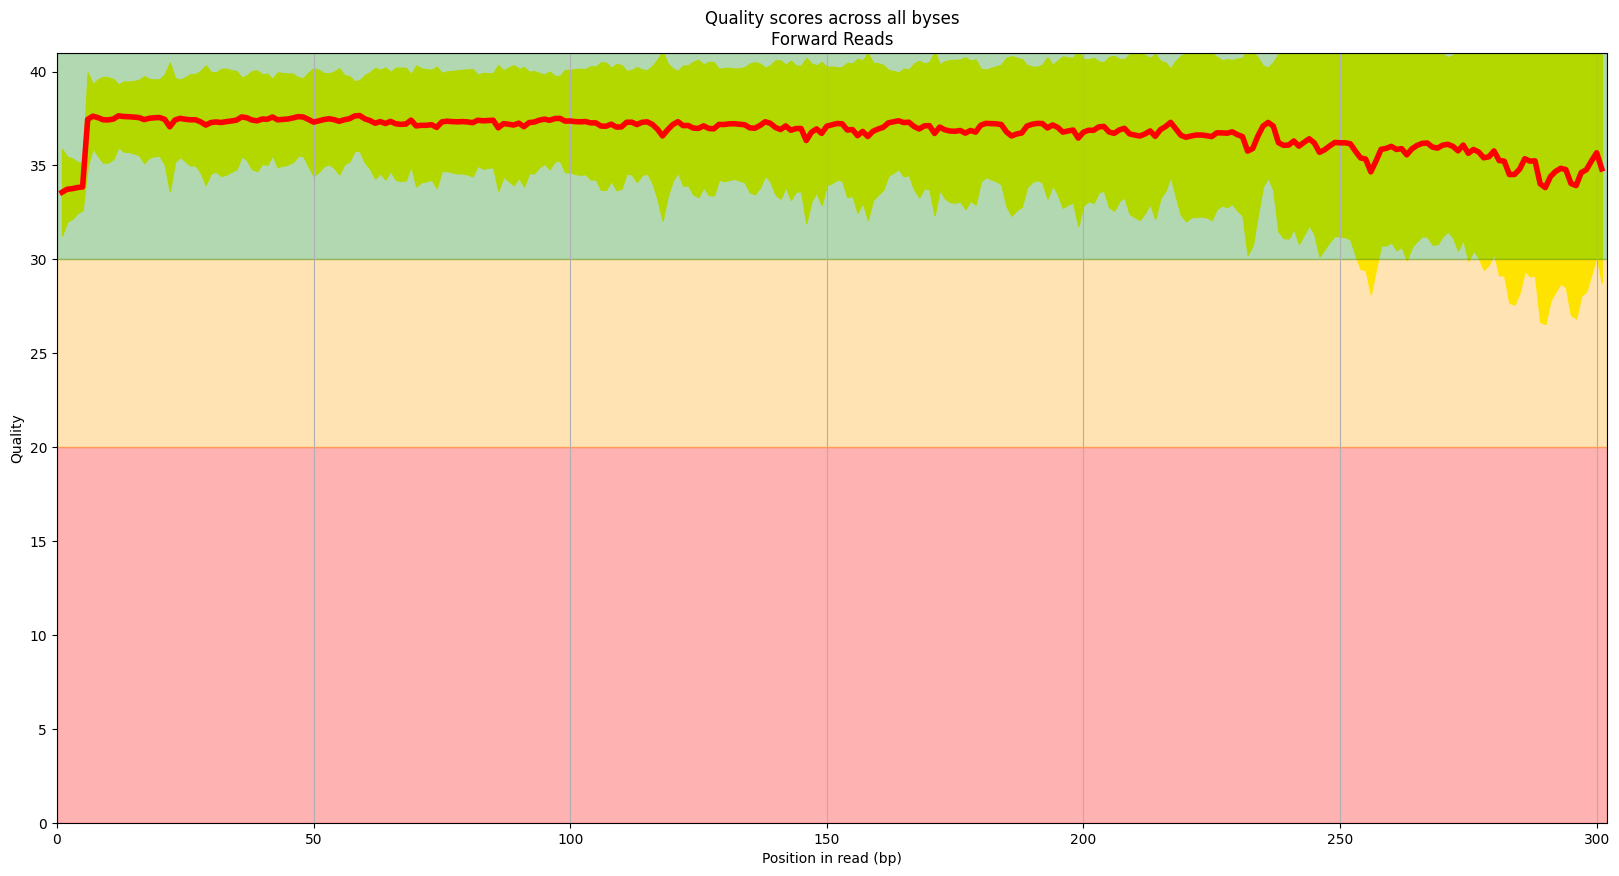

In [8]:
# 1. perform quality check

import matplotlib.pyplot as plt
from sequana import FastQC, PacbioSubreads

# Forward Reads #
qc = FastQC(str(Path.joinpath(data_dir, R1)), verbose=True)
plt.figure(figsize=(20,10))
qc.boxplot_quality()
plt.title("Quality scores across all byses\nForward Reads")
plt.show()

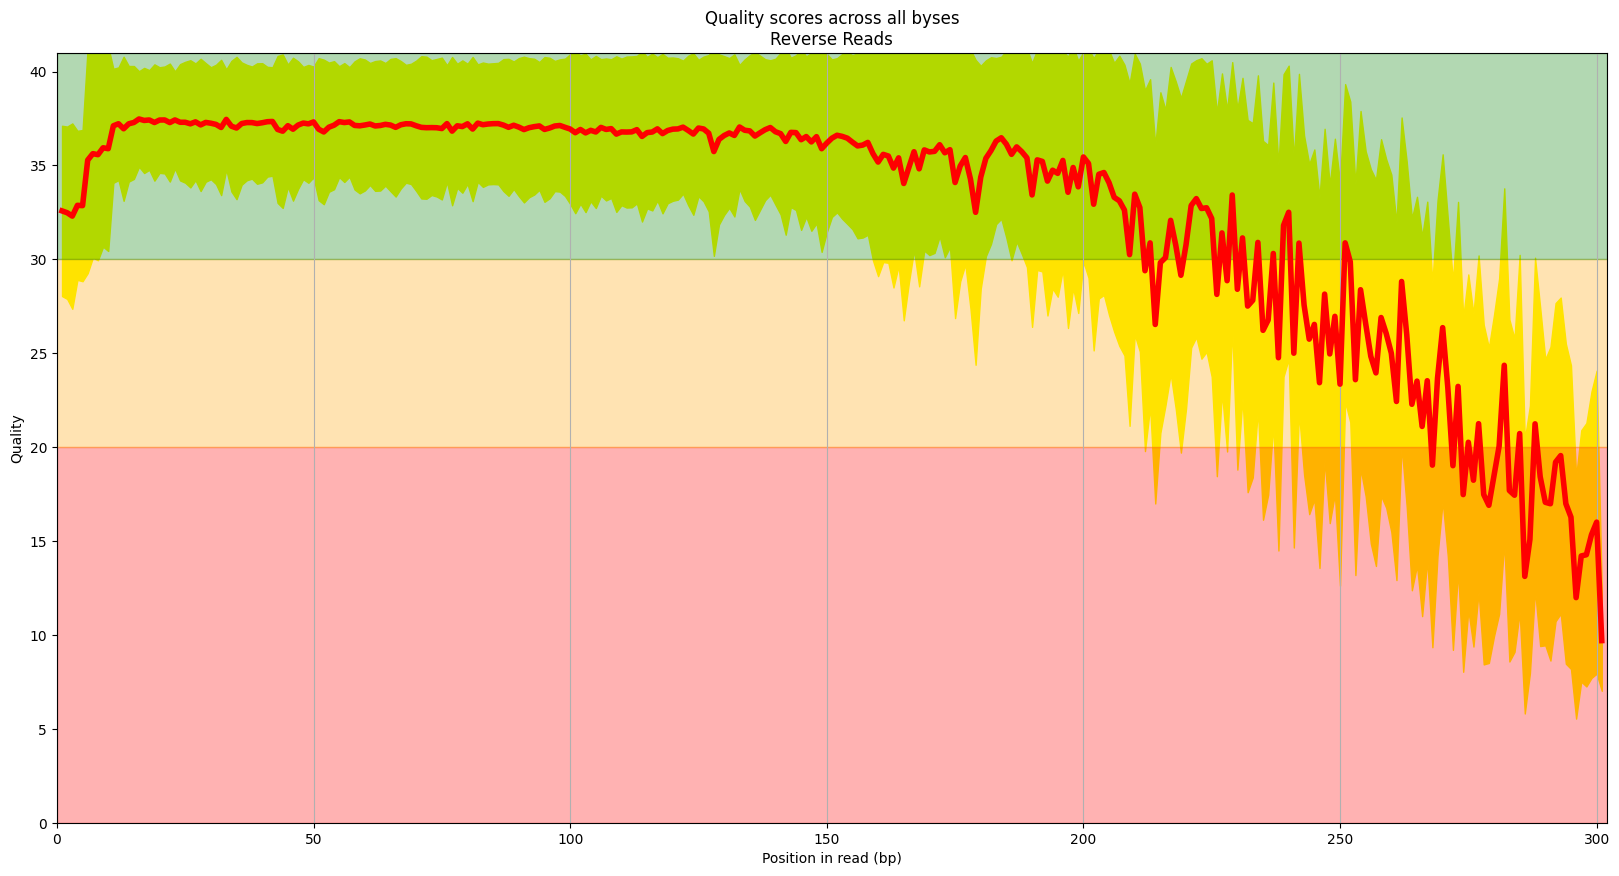

In [9]:
# reverse reads
qc = FastQC(str(Path.joinpath(data_dir, R2)), verbose=True)
plt.figure(figsize=(20,10))
qc.boxplot_quality()
plt.title("Quality scores across all byses\nReverse Reads")
plt.show()

In [10]:
# 2. clean data
from Bio import SeqIO
from Bio.Seq import Seq

p1 = Seq(primer1)
p1_comp = p1.complement()
p1_rev_comp = p1.reverse_complement()

p2 = Seq(primer2)
p2_comp = p2.complement()
p2_rev_comp = p2.reverse_complement()

print(p1)
print(p1_comp)
print(p1_rev_comp)
print()
print(p2)
print(p2_comp)
print(p2_rev_comp)
print()

counter = 0
for r1, r2 in zip(SeqIO.parse(data_dir / R1, "fastq"), SeqIO.parse(data_dir / R2, "fastq")):
  print("R1", r1.seq)
  print("R2",   r2.seq)
  print("Phred Quality (str)", "".join([chr(q + 33) for q in r1.letter_annotations["phred_quality"]]))
  print("Phred Quality", r1.letter_annotations["phred_quality"])

  counter += 1
  if counter > 1:
    break


TACGACAAGTGGGAGATGGAACG
ATGCTGTTCACCCTCTACCTTGC
CGTTCCATCTCCCACTTGTCGTA

TGTTGTAGGCCAGGCTCTCG
ACAACATCCGGTCCGAGAGC
CGAGAGCCTGGCCTACAACA

R1 TACGACAAGTGGGAGATGGAACGCACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGGAAGGTGTACGAGGGCGTGTGGAAGAAATACAGCCTGACGGTGGCCGTGAAGACCTTGAAGGAGGACACCATGGAGGTGGAAGAGTTCTTGAAAGAAGCTGCAGTCATGAAAGAGATCAAACACCCTAACCTGGTGCAGCTCCTTGGGGTCTGCACCCGGGAGACCCCGTTCTATATCATCACTGAGTTCATGACCTACGGGAACCTCCTGGACTACCTGAGGGAGTGCAACC
R2 CTCAGCTCCATGTTGTAGGCCAGGCTCTCGGGTGCAGTCCATTTGATGGGGAACTTGGCTCCAGCATGGGCTGTGTAGGTGTCCCCTGTCATCAACCTGCTCAGGCCAAAATCAGCTACCTTCACCAAGTGGTTCTCCCCTACCAGGCAGTTTCGGGCAGCAAGATCTCTGTGGATGAAGTTTTTCTTCTCCAGGTACTCCATGGCTGTCGAGATCTTAGTGGCCCTGTACCGCCTCACCACGCCTTTCACCTCCTTCCGTTTTCACTCCCTCCGGTCGTCCAGTAGGTTCCCGTTGGTCT
Phred Quality (str) @<CA<FEDFG<@@9@;FDCC9F;F7@@7:C7FE<FFCF99@CC8F8FEFGF?CCC7FE7FEGFGDFEDDC7@@FFFCFG>C+@CBFEG@CFF8@F@FCFGFFGGFFF@EFDDFGGG7CGDFGFGGA=CFG8FCCFCFGFGD?,CCGFFFGGDFGGGGGFFCDFFFFGGGGFFGGGG?E:CFFGGGGG8CFFGGGGFFFGGGGGFF<@GGGGGG7?CEGGGFGFGGGG5EDGDG

In [11]:
# clean data
import numpy as np
from tqdm import tqdm

out1 = open(data_dir / "R1_cleaned.fastq", "w")
out2 = open(data_dir / "R2_cleaned.fastq", "w")

counter = 0
for r1, r2 in tqdm(zip(SeqIO.parse(data_dir / R1, "fastq"), SeqIO.parse(data_dir / R2, "fastq"))):
  if r1.seq.find(p1) and r2.seq.find(p2) and np.mean(r1.letter_annotations['phred_quality']) > 30 and np.mean(r2.letter_annotations['phred_quality']) > 30:
    out1.write("@" + r1.id + "\n")
    out1.write(str(r1.seq[r1.seq.find(p1):]) + "\n")
    out1.write("+" + "\n")
    out1.write("".join([chr(x+33) for x in r1.letter_annotations["phred_quality"]][r1.seq.find(p1):]) + "\n")

    out2.write("@" + r2.id + "\n")
    out2.write(str(r2.seq[r2.seq.find(p2):]) + "\n")
    out2.write("+" + "\n")
    out2.write("".join([chr(x+33) for x in r2.letter_annotations["phred_quality"]][r2.seq.find(p2):]) + "\n")

out1.close()
out2.close()

2854it [00:00, 9371.48it/s]

147084it [00:13, 10741.78it/s]


In [12]:
# 3. perform mapping (using bowtie2 or bwa - e.g. on https://usegalaxy.org/ or install bowtie2/bwa)
# 4. perform consensus sequence (using e.g., ivar consensus on https://usegalaxy.org/)
# 5. perform multiple sequence alignment (using e.g., https://www.ebi.ac.uk/Tools/msa/clustalo/)
# 6. merge sequences (using e.g., Samtools merge)
# 7. load the generated BAM and BAI files into IGV

### 3. "Real-Life" Example: Gene expression analysis in acute myeloid leukemia (AML) patients

In [13]:
# 1. get data > go to https://www.ncbi.nlm.nih.gov/geo/browse/ or https://www.ebi.ac.uk/arrayexpress/browse.html and search for "AML" > sort by "Assays" > use GSE12417
# 2. use GEOparse to download GSE12417

import GEOparse
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

gse_name = "GSE12417"
gse = GEOparse.get_GEO(geo=gse_name, destdir=data_dir)


06-Mar-2024 13:20:59 DEBUG utils - Directory /home/bobek/University/6th_semester/Algorithms_and_Tools_in_Bio_Informatics/ATBI_02_Suppl/data already exists. Skipping.
06-Mar-2024 13:20:59 INFO GEOparse - File already exist: using local version.
06-Mar-2024 13:20:59 INFO GEOparse - Parsing /home/bobek/University/6th_semester/Algorithms_and_Tools_in_Bio_Informatics/ATBI_02_Suppl/data/GSE12417_family.soft.gz: 
06-Mar-2024 13:20:59 DEBUG GEOparse - DATABASE: GeoMiame
06-Mar-2024 13:20:59 DEBUG GEOparse - SERIES: GSE12417
06-Mar-2024 13:20:59 DEBUG GEOparse - PLATFORM: GPL96
06-Mar-2024 13:20:59 DEBUG GEOparse - PLATFORM: GPL97
06-Mar-2024 13:21:00 DEBUG GEOparse - PLATFORM: GPL570
/home/bobek/.local/lib/python3.11/site-packages/GEOparse/GEOparse.py:401: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

06-Mar-2024 13:21:02 DEBUG GEOparse - SAMPLE: GSM311598
06-Mar-2024 13:21:02 DEBUG GEOparse - SAMPLE: GSM311599
06-Mar-2024 13:21:02 DEBUG 

In [14]:
# 3. get target gene IDs
# 3a. go to http://biogps.org/#goto=welcome and search for the required genes
# 3b. download the platform file (e.g., GPL96-57554.txt) from your GEO dataset and use e.g., pandas to find the IDs

platform_file = "GPL570-55999.txt"
skiprows = len([x for x in open(data_dir / platform_file).readlines() if x[0] == "#"]) 
df_refs = pd.read_csv(data_dir / platform_file, sep="\t", skiprows=skiprows, usecols=["ID", "Gene Symbol", "ENTREZ_GENE_ID"])
df_refs = df_refs.set_index("ID")


In [15]:
df_refs.head()

,Gene Symbol,ENTREZ_GENE_ID
ID,,
1007_s_at,DDR1 /// MIR4640,780 /// 100616237
1053_at,RFC2,5982
117_at,HSPA6,3310
121_at,PAX8,7849
1255_g_at,GUCA1A,2978


In [16]:
# get reporter ID from platform specific file
gene_name = "TNF"
print(df_refs.where(df_refs["Gene Symbol"].str.contains(gene_name)).dropna(how="all").sort_values("Gene Symbol"))

                         Gene Symbol       ENTREZ_GENE_ID
ID                                                       
209426_s_at  AMACR /// C1QTNF3-AMACR  23600 /// 100534612
209425_at    AMACR /// C1QTNF3-AMACR  23600 /// 100534612
209424_s_at  AMACR /// C1QTNF3-AMACR  23600 /// 100534612
224197_s_at                  C1QTNF1               114897
220975_s_at                  C1QTNF1               114897
...                              ...                  ...
207426_s_at                   TNFSF4                 7292
207216_at                     TNFSF8                  944
235735_at                     TNFSF8                  944
241819_at                     TNFSF8                  944
206907_at                     TNFSF9                 8744

[102 rows x 2 columns]


In [17]:
gene_name = "TNF"
print(df_refs.where(df_refs["Gene Symbol"] == gene_name).dropna(how="all").sort_values("Gene Symbol"))

            Gene Symbol ENTREZ_GENE_ID
ID                                    
207113_s_at         TNF           7124


In [18]:
# 4. define target genes
genes = ["IL1B", "IL1A", "TNF"]
ids = ["205067_at","208200_at","207113_s_at"]

In [19]:
# 5. prepare data
counter = 0
for gsm_name, gsm in gse.gsms.items():
    my_gsm = gsm
    counter += 1
    if counter > 1:
      break


In [20]:
gsm.metadata

{'title': ['CN_AML Patient 2 (U133A)'],
 'geo_accession': ['GSM311599'],
 'status': ['Public on Aug 22 2008'],
 'submission_date': ['Aug 12 2008'],
 'last_update_date': ['Nov 14 2018'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['bone marrow mononuclear cells'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['AML, normal karyotype (training set) FAB M4; age =59 years; OS = 104 days; status (0=alive/1=dead): 0'],
 'treatment_protocol_ch1': ['Pretreatment bone marrow or peripheral blood mononuclear cells from patients with newly diagnosed acute myeloid leukemia (AML) with a normal karyotype'],
 'growth_protocol_ch1': ['N/A'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Mononuclear cells from bone marrow (BM) or peripheral blood (PB) were enriched by Ficoll gradient centrifugation. Total RNA was isolated using the RNeasy Mini Kit (Qiagen, Hilden, Germany). cDNA preparation and  in vitro transcription were performed a

In [21]:
cols = ["GSM_ID","Platform_ID","Source", "FAB", "Age", "OS", "Status"] + genes

informations = {}
for col in cols:
  informations[col] = []

In [22]:
gsm.table

,ID_REF,VALUE
0,1007_s_at,9.647614
1,1053_at,8.101409
2,117_at,8.069666
3,121_at,10.754475
4,1255_g_at,6.809401
...,...,...
22278,AFFX-r2-Hs18SrRNA-5_at,NaN
22279,AFFX-r2-Hs18SrRNA-M_x_at,NaN
22280,AFFX-r2-Hs28SrRNA-3_at,NaN
22281,AFFX-r2-Hs28SrRNA-5_at,NaN


In [26]:
# 5a. collect data
for gsm_name, gsm in gse.gsms.items():
    my_gsm = gsm

    char = gsm.metadata["characteristics_ch1"][0]

    if char.find("FAB") >= 0:
      
      char = [x.replace(" ", "") for x in char[char.find("FAB"):].split(";")]
      
      informations["GSM_ID"].append(gsm_name)

      informations["Platform_ID"].append(gsm.metadata["platform_id"][0])
      informations["FAB"].append(char[0])
      informations["Age"].append(char[1])
      try:
        informations["OS"].append(char[2])
      except:
        informations["OS"].append(np.nan)

      try:
        informations["Status"].append(char[3])
      except:
        informations["Status"].append(np.nan)

      for x in range(len(genes)):
        value = gsm.table["VALUE"].where(gsm.table["ID_REF"] == ids[x]).dropna()
        try:
          informations[genes[x]].append(float(value))
        except:
          informations[genes[x]].append(np.nan)

/tmp/ipykernel_22204/3150625884.py:29: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/tmp/ipykernel_22204/3150625884.py:29: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/tmp/ipykernel_22204/3150625884.py:29: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/tmp/ipykernel_22204/3150625884.py:29: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/tmp/ipykernel_22204/3150625884.py:29: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/tmp/ipykernel_22204/3150625884.py:29: FutureWarning:

Calling float on a single

In [29]:
df_informations = pd.DataFrame.from_dict(informations, orient="index").T
df_informations = df_informations.set_index("GSM_ID")

df_informations = df_informations.where (df_informations["Platform_ID"] == "GPL96").dropna(how="all")

In [30]:
df_informations

,Platform_ID,Source,FAB,Age,OS,Status,IL1B,IL1A,TNF
GSM_ID,,,,,,,,,
GSM311598,GPL96,None,FABM4,age=62years,OS=4days,status(0=alive/1=dead):1,9.977674,8.407163,8.683989
GSM311599,GPL96,None,FABM4,age=59years,OS=104days,status(0=alive/1=dead):0,11.334261,7.92033,8.807821
GSM311600,GPL96,None,FABM2,age=66years,OS=432days,status(0=alive/1=dead):1,12.115663,7.916141,8.27815
GSM311601,GPL96,None,FABM4,age=66years,OS=280days,status(0=alive/1=dead):0,13.603756,8.010941,10.061773
GSM311603,GPL96,None,FABM2,age=52years,OS=657days,status(0=alive/1=dead):1,11.059689,7.88763,9.561741
...,...,...,...,...,...,...,...,...,...
GSM311756,GPL96,None,FABM4,age=53years,OS=51days,status(0=alive/1=dead):1,11.181587,7.595621,9.083685
GSM311757,GPL96,None,FABM5,age=56years,OS=676days,status(0=alive/1=dead):0,11.988737,7.425169,9.373297
GSM311758,GPL96,None,FABM4,age=53years,OS=1176days,status(0=alive/1=dead):0,9.519278,7.679303,8.32102


In [31]:
Counter(df_informations["FAB"])

Counter({'FABM2': 90,
         'FABM1': 90,
         'FABM4': 84,
         'FABM5': 38,
         'FABM6': 12,
         'FABM0': 10})

In [32]:
# in the case of numpy deprecation error:
np.float = np.float64
np.bool = np.bool_
np.int = np.int32

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



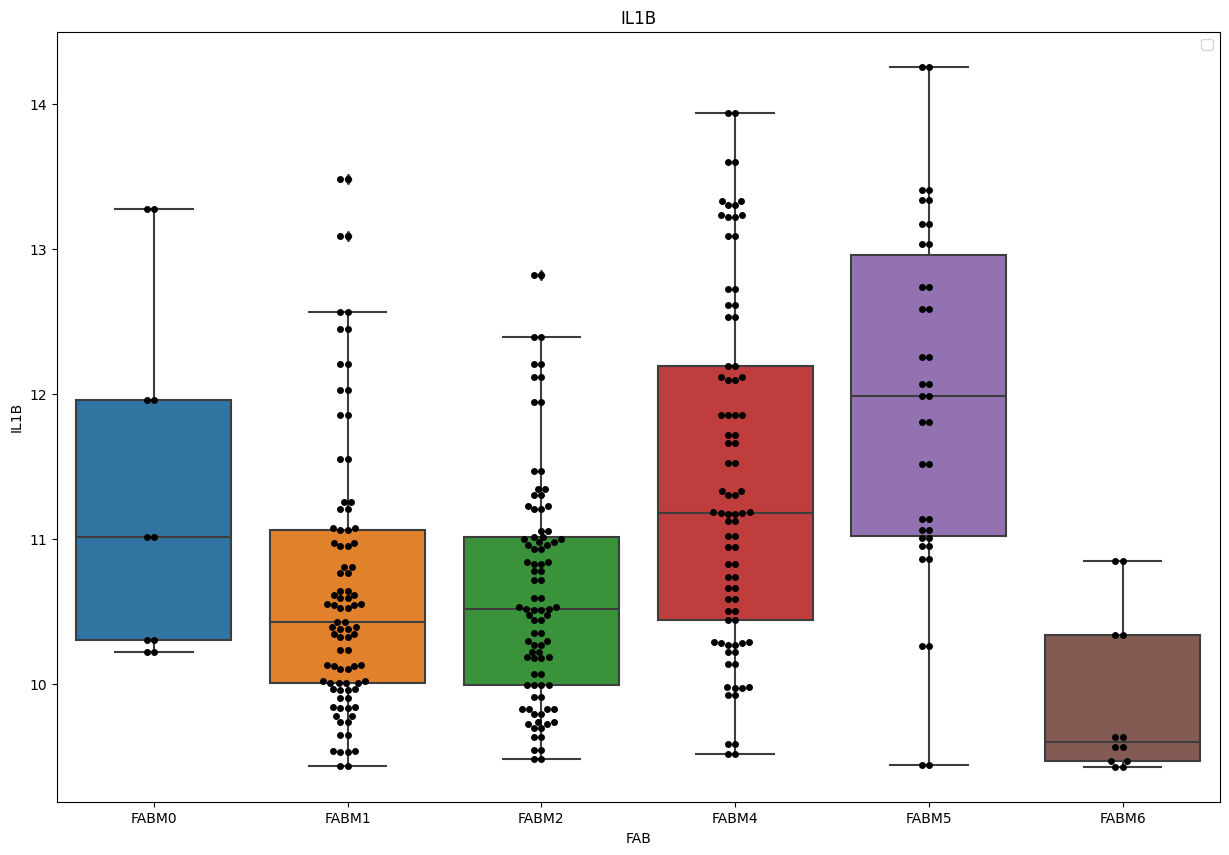

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



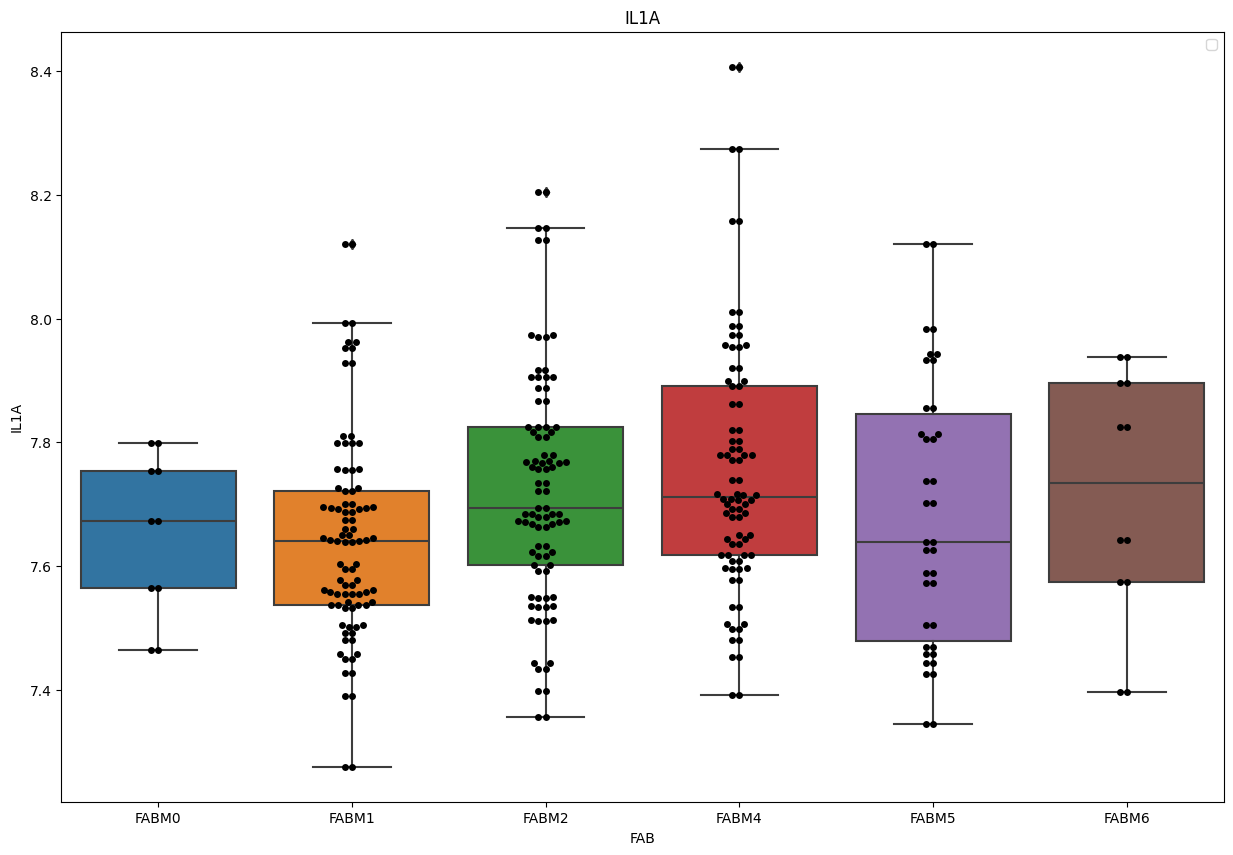

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/bobek/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



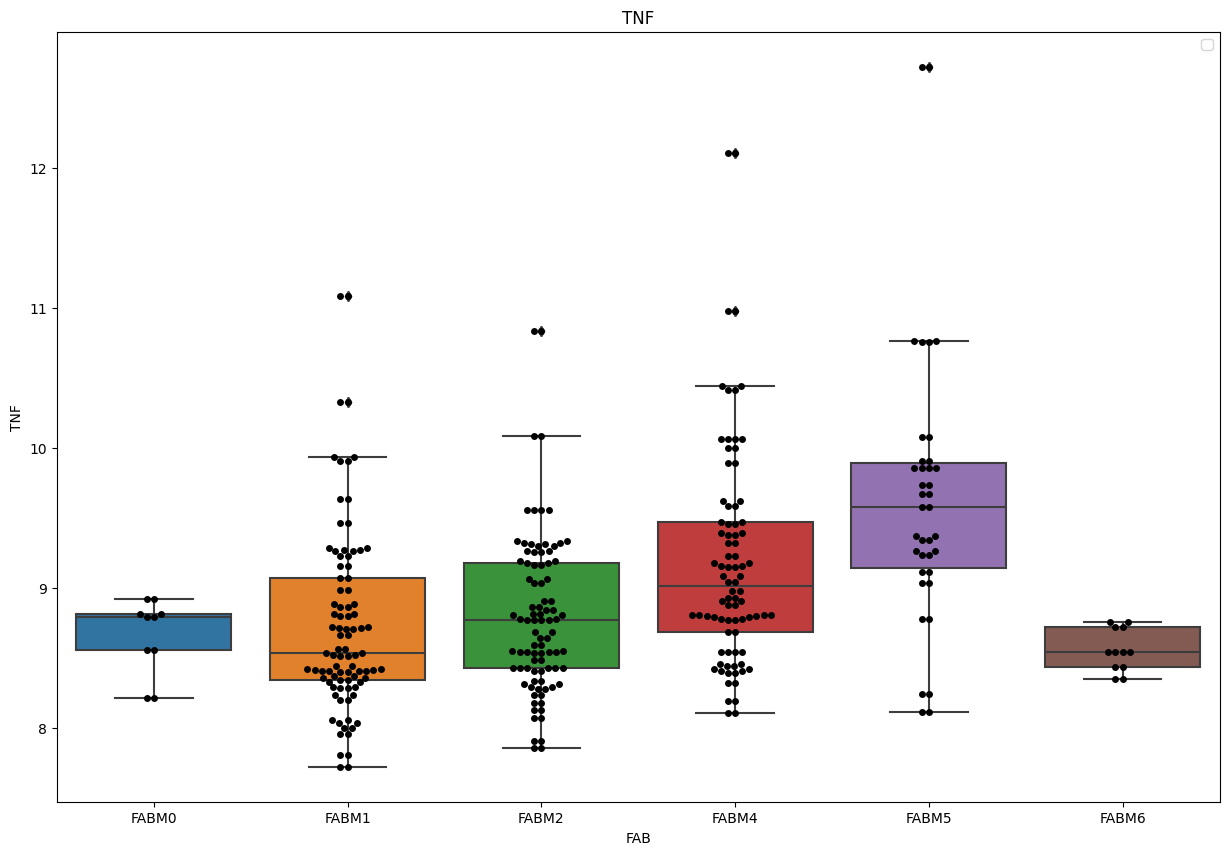

In [34]:
# 6. compare FAB classes
for gene in genes:
  df_informations[gene] = df_informations[gene].astype(float)

  order = sorted(list(np.unique(df_informations["FAB"])))

  plt.figure(figsize=(15,10))
  sns.boxplot(data=df_informations, x="FAB", y=gene, order=order)
  sns.swarmplot(data=df_informations, x="FAB", y=gene, order=order, color="black")
  plt.legend([])
  plt.title(gene)
  plt.show()

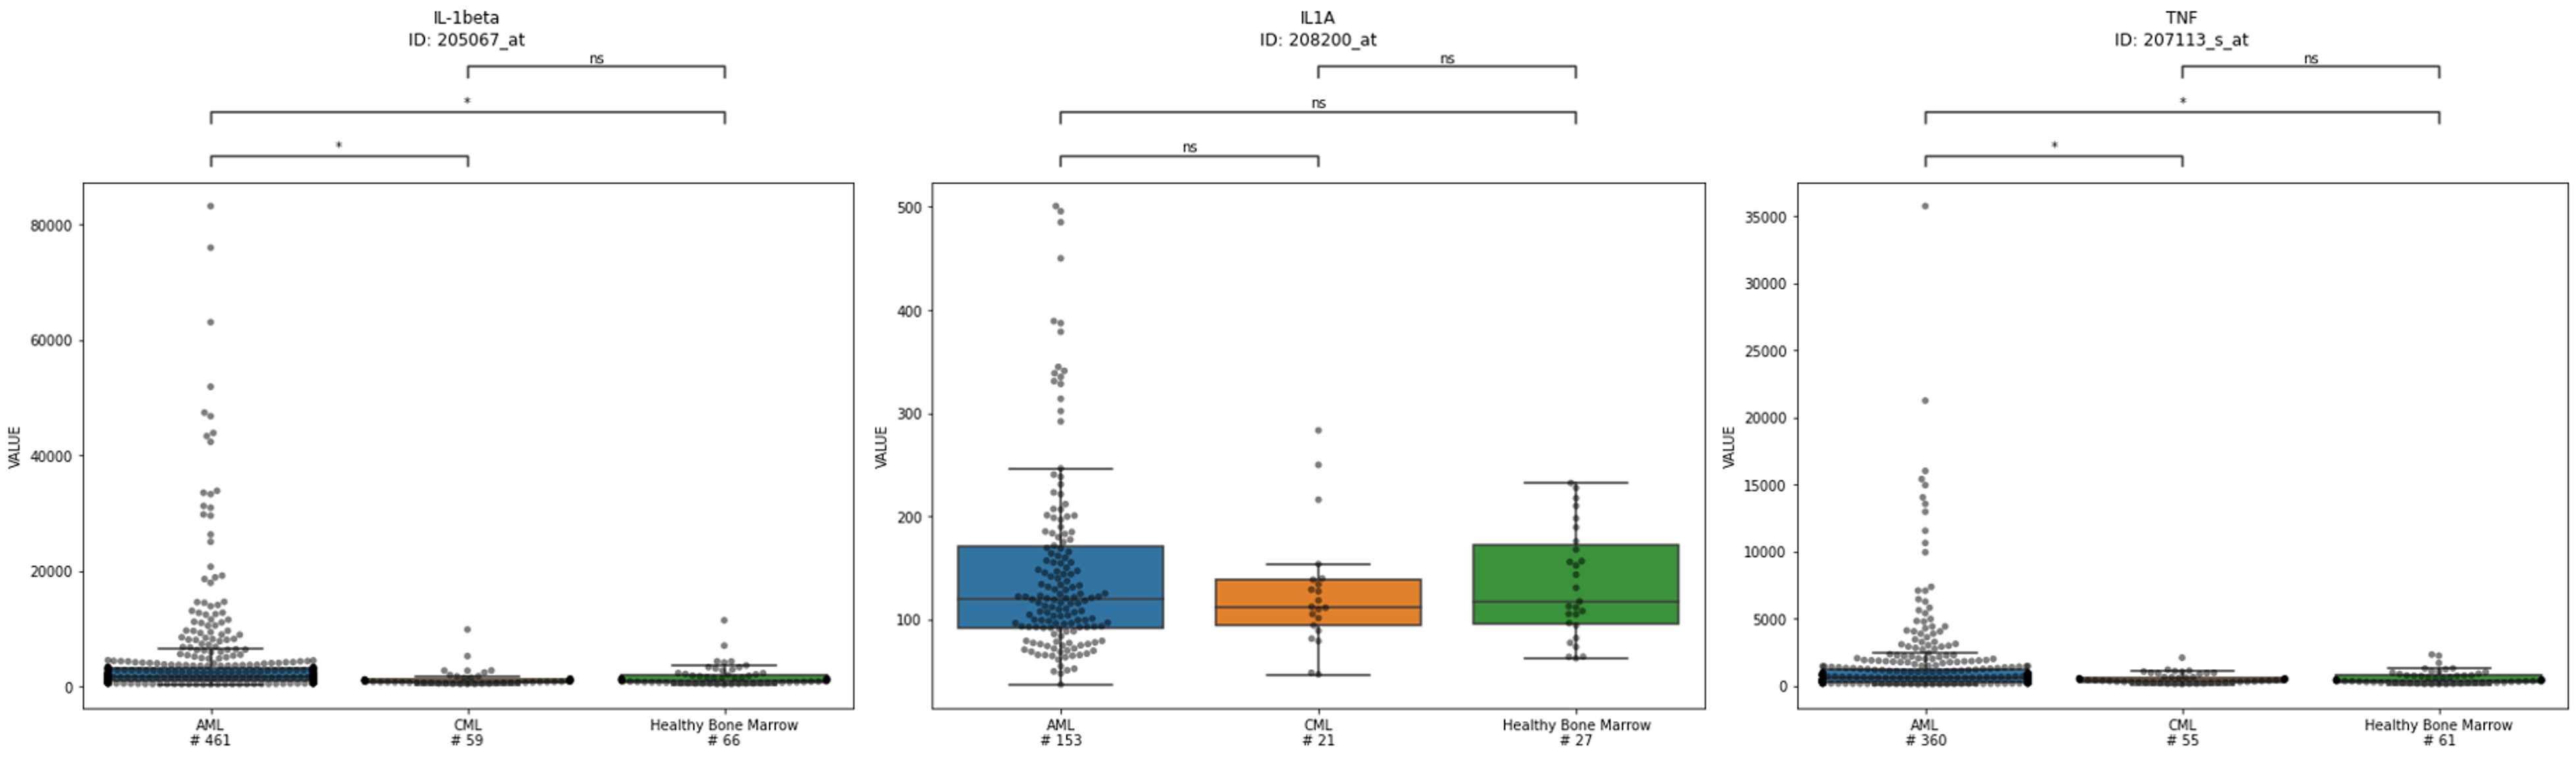

In [36]:
# 7. compare AML vs Healthy individuals using GSE13159

from IPython.display import Image, display

display(Image(Path.joinpath(base_dir,"images","GSE13159.png")))


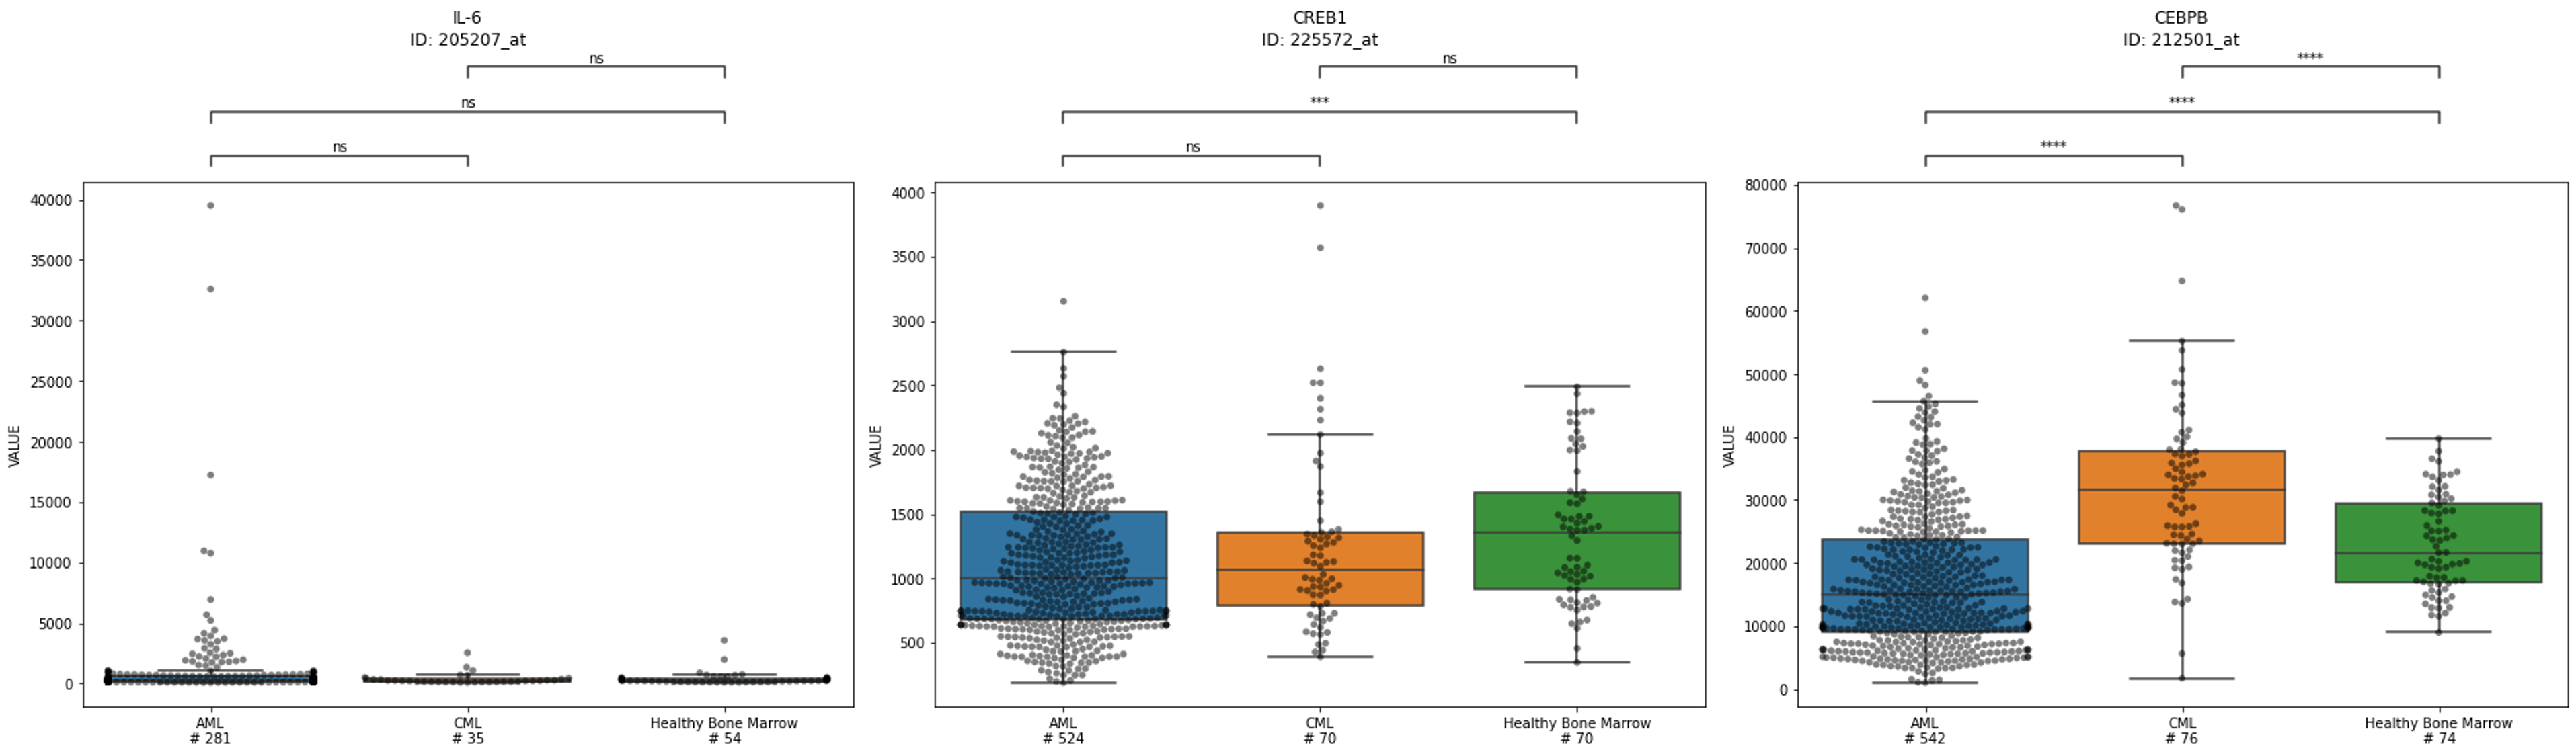

In [37]:
# 8. go to https://www.genome.jp/kegg/ and search for additional targets > search for IL1B > select TNF SIGNALING PATHWAY
from IPython.display import Image, display
display(Image(Path.joinpath(base_dir,"images","GSE13159_2.png")))


In [39]:
# 9. perform ML (classification AML or healthy control (HC) using GSE13159 data)
import pandas as pd
import numpy as np

# import data and prep
df = pd.read_csv(data_dir / "GSE13159_ML.csv", sep="\t")
df = df.set_index("Unnamed: 0")
df = df.dropna()
df = df.T
df = df.reset_index(drop=True)

for x in df.columns:
  if x != "Target": df[x] = df[x].astype(float)


/tmp/ipykernel_22204/39038264.py:6: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102) have mixed types. Specify dtype option on import or set low_memory=False.



In [40]:
# data prep for ML
y_names = np.array(df['Target'])
l = lambda x : 1 if x == "AML" else 0
y = np.array([l(x) for x in y_names])
x = np.array(df.drop('Target', axis=1))
x_names = list(df.drop('Target', axis=1).columns)

# get training and validation data
from sklearn.model_selection import train_test_split

X, x_val, Y, y_val = train_test_split(x, y, test_size=0.3, random_state = 42)

# Cross-validation (5-fold CV)
from sklearn.model_selection import StratifiedKFold

n_split = 5

skf = StratifiedKFold(n_splits=n_split)
skf.get_n_splits(X, Y)

# train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

acc = []
feature_importances = []

counter = 0
for train_index, test_index in skf.split(X, Y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  clf = RandomForestClassifier(n_estimators=100)#, max_depth=5, min_samples_split=5, min_samples_leaf=2, max_features=None, max_leaf_nodes=10, bootstrap=False, oob_score=False, class_weight=class_weight)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  # calculate accuracy
  conf = confusion_matrix(y_test, y_pred)

  trues = 0
  for i in range(len(conf)):
      trues += conf[i,i]

  acc.append(trues/sum(sum(conf)))

  # get feature importances
  if counter == 0:
    feature_importances = pd.DataFrame(clf.feature_importances_, index = x_names, columns=['importance_CV' + str(counter+1)])
  else:
    temp_feature_importances = pd.DataFrame(clf.feature_importances_, index = x_names, columns=['importance_CV' + str(counter+1)])
    feature_importances = pd.concat([feature_importances, temp_feature_importances], axis=1)

  counter += 1
  print(acc)

[0.9333333333333333]
[0.9333333333333333, 1.0]
[0.9333333333333333, 1.0, 1.0]
[0.9333333333333333, 1.0, 1.0, 1.0]
[0.9333333333333333, 1.0, 1.0, 1.0, 1.0]


In [41]:
feature_importances

,importance_CV1,importance_CV2,importance_CV3,importance_CV4,importance_CV5
1294_at,0.006749,0.000000,0.007256,0.0,0.0
1405_i_at,0.000000,0.000000,0.000000,0.0,0.0
1552263_at,0.000000,0.000000,0.000000,0.0,0.0
1552287_s_at,0.000000,0.000000,0.000000,0.0,0.0
1552329_at,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,0.000000,0.000708,0.000000,0.0,0.0
AFFX-r2-Ec-bioD-3_at,0.000000,0.000000,0.000000,0.0,0.0
AFFX-r2-Ec-bioD-5_at,0.000000,0.000000,0.000000,0.0,0.0
AFFX-r2-P1-cre-3_at,0.000000,0.000000,0.000000,0.0,0.0
